In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import warnings


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('music_genre.csv')
columns = ['popularity',
           'acousticness', 'danceability', 'duration_ms', 'energy',
           'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
           'speechiness', 'tempo', 'valence', 'music_genre']
df = df[columns]
df = df.dropna()
df = df[(df['duration_ms']>0) & (df['loudness']<0) & (df['valence']>0)]
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df = df.dropna()
df['tempo'] = df['tempo'].round(2)
encode = ['key', 'mode', 'music_genre']
label_encoder = LabelEncoder()
for col in encode:
    df[col] = label_encoder.fit_transform(df[col])
df = df.dropna()
df

popularity  acousticness  danceability  duration_ms  energy  \
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
6            46.0       0.02890         0.572     214408.0   0.803   
...           ...           ...           ...          ...     ...   
49999        56.0       0.13300         0.849     237667.0   0.660   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  key  liveness  loudness  mode  speechiness   tempo  \
1              0.950000    5     0.124    -7.043     1       0.0300  115.00   
2              0.011800   11     0.534    -4.617     0       0.0345  127.99   
3              0.002530    4     0.157    -4.498     0       0.2390  128.01   
4              0.909000    9     0.157    -6.266     0       0.0413  145.04   
6              0.000008    2     0.106    -4.294     0       0.3510  150.00   
...                 ...  ...       ...       ...   ...          ...     ...   
49999          0.000008    3     0.296    -7.195     0       0.0516   99.99   
50001          0.000000    2     0.109    -9.814     0       0.0550  122.04   
50002          0.000000    5     0.143    -5.443     0       0.1460  131.08   
50003          0.000000   10     0.106    -5.016     1       0.0441   75.89   
50004          0.000000    9     0.272   -13.652     1       0.1010   99.20   

       valence  music_genre  
1        0.531            5  
2        0.333            5  
3        0.270            5  
4        0.323            5  
6        0.230            5  
...        ...          ...  
49999    0.629            6  
50001    0.113            6  
50002    0.395            6  
50003    0.354            6  
50004    0.765            6  

[40518 rows x 14 columns]

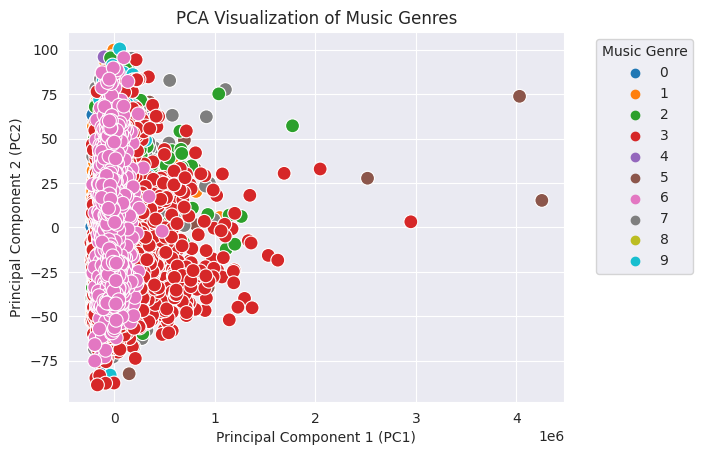

In [4]:
X = df.drop('music_genre', axis=1)
y = df['music_genre']

# Perform PCA transformation to reduce features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the reduced features and target
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])
pca_df['music_genre'] = y.reset_index(drop = True)

# Visualize the reduced features in a scatter plot
sns.scatterplot(x='Component 1', y='Component 2', hue="music_genre", data=pca_df, palette="tab10", s=100)
plt.title("PCA Visualization of Music Genres")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Music Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

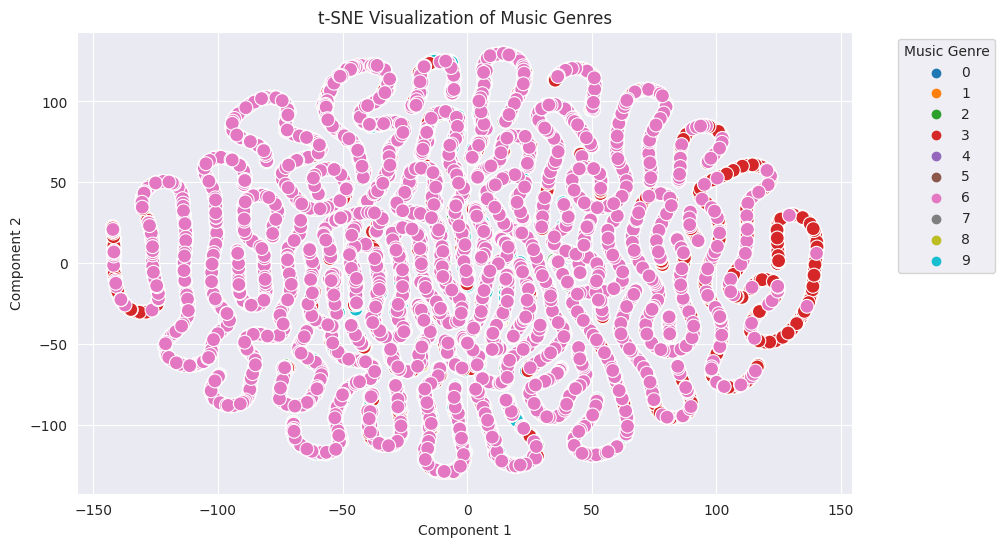

In [5]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Step 3: Create a new DataFrame with t-SNE components and target
tsne_df = pd.DataFrame(data=X_tsne, columns=["Component 1", "Component 2"])
tsne_df["music_genre"] = y.reset_index(drop=True)

# Step 4: Visualize t-SNE components
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Component 1", y="Component 2", hue="music_genre", data=tsne_df, palette="tab10", s=100)
plt.title("t-SNE Visualization of Music Genres")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Music Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

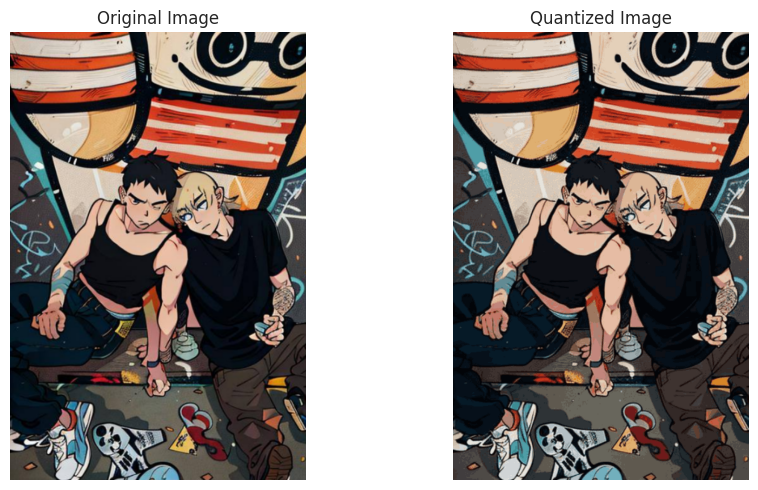

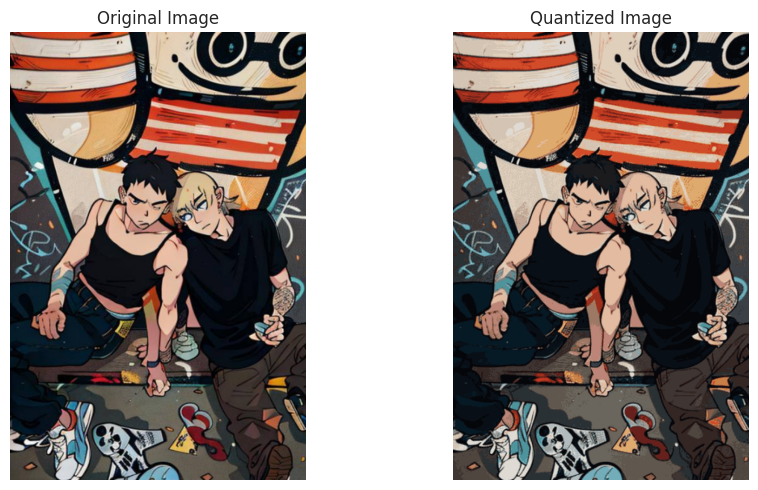

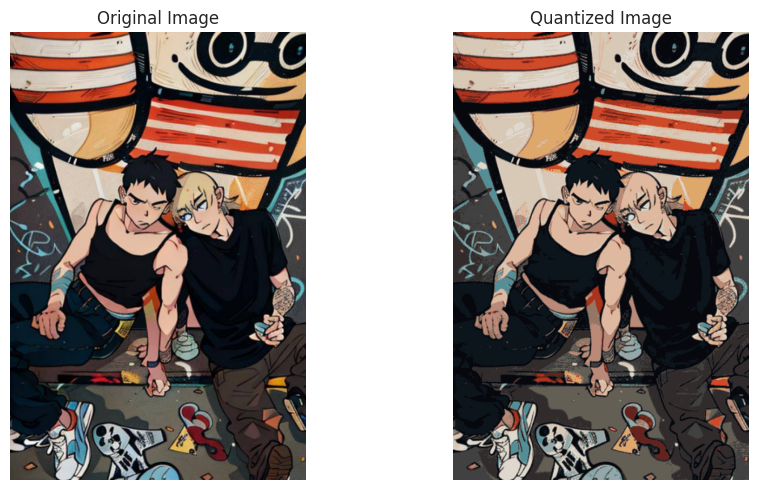

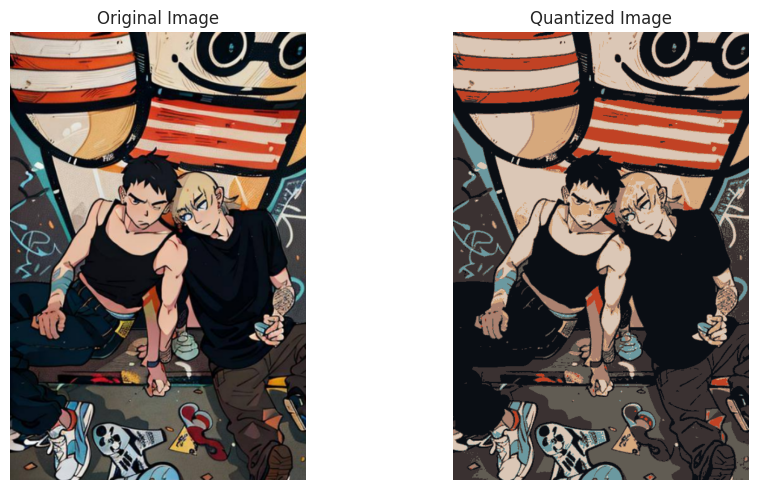

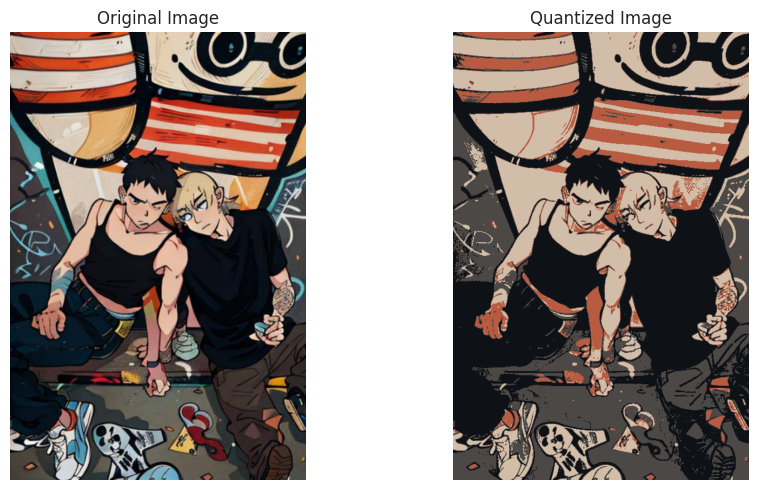

In [12]:
image_path = "1.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Reshape the image to be a list of pixels
pixels = image.reshape(-1, 3)

# Number of clusters (desired number of colors after quantization)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    for num_clusters in [64, 32, 16, 8, 4]:
    
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(pixels)
        quantized_colors = kmeans.cluster_centers_.astype(int)
        labels = kmeans.labels_
    
        # Replace each pixel with the nearest cluster center
        quantized_pixels = quantized_colors[labels]
    
        # Reshape the quantized image to its original shape
        quantized_image = quantized_pixels.reshape(image.shape)
    
        # Display the original and quantized images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')
    
        plt.subplot(1, 2, 2)
        plt.imshow(quantized_image)
        plt.title('Quantized Image')
        plt.axis('off')
    
        plt.tight_layout()
        plt.show()

In [15]:
df = pd.read_csv('Stress.csv')
df = df[['text', 'label']]
df

text  label
0     He said he had not felt that way before, sugge...      1
1     Hey there r/assistance, Not sure if this is th...      0
2     My mom then hit me with the newspaper and it s...      1
3     until i met my new boyfriend, he is amazing, h...      1
4     October is Domestic Violence Awareness Month a...      1
...                                                 ...    ...
2833  * Her, a week ago: Precious, how are you? (I i...      0
2834  I don't have the ability to cope with it anymo...      1
2835  In case this is the first time you're reading ...      0
2836  Do you find this normal? They have a good rela...      0
2837  I was talking to my mom this morning and she s...      1

[2838 rows x 2 columns]

In [21]:
import re
import string
import spacy

import nltk
# from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwordf = nltk.corpus.stopwords.words('english')
# porter_stemmer = PorterStemmer()

tokenizer = spacy.load("en_core_web_sm")


def preprocess_text(text):
    text = text.lower()  # Convert text to lower case
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation marks
    return text


def get_tokens(text):
    tokens = tokenizer(text)  # tokenization
    tokens = [i for i in tokens if str(i) not in stopwordf]  # removing stop wordf
    tokens = [wordnet_lemmatizer.lemmatize(str(i)) for i in tokens]  # lemmatize
    return tokens


df.loc[:, 'text'] = df['text'].apply(preprocess_text)
df.loc[:, 'tokens'] = df['text'].apply(get_tokens)
df.head(5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /home/c1l1r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/c1l1r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/c1l1r/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


text  label  \
0  he said he had not felt that way before sugget...      1   
1  hey there rassistance not sure if this is the ...      0   
2  my mom then hit me with the newspaper and it s...      1   
3  until i met my new boyfriend he is amazing he ...      1   
4  october is domestic violence awareness month a...      1   

                                              tokens  
0  [said, felt, way, suggeted, go, rest, trigger,...  
1  [hey, rassistance, sure, right, place, post, g...  
2  [mom, hit, newspaper, shocked, would, know, nt...  
3  [met, new, boyfriend, amazing, kind, sweet, go...  
4  [october, domestic, violence, awareness, month...

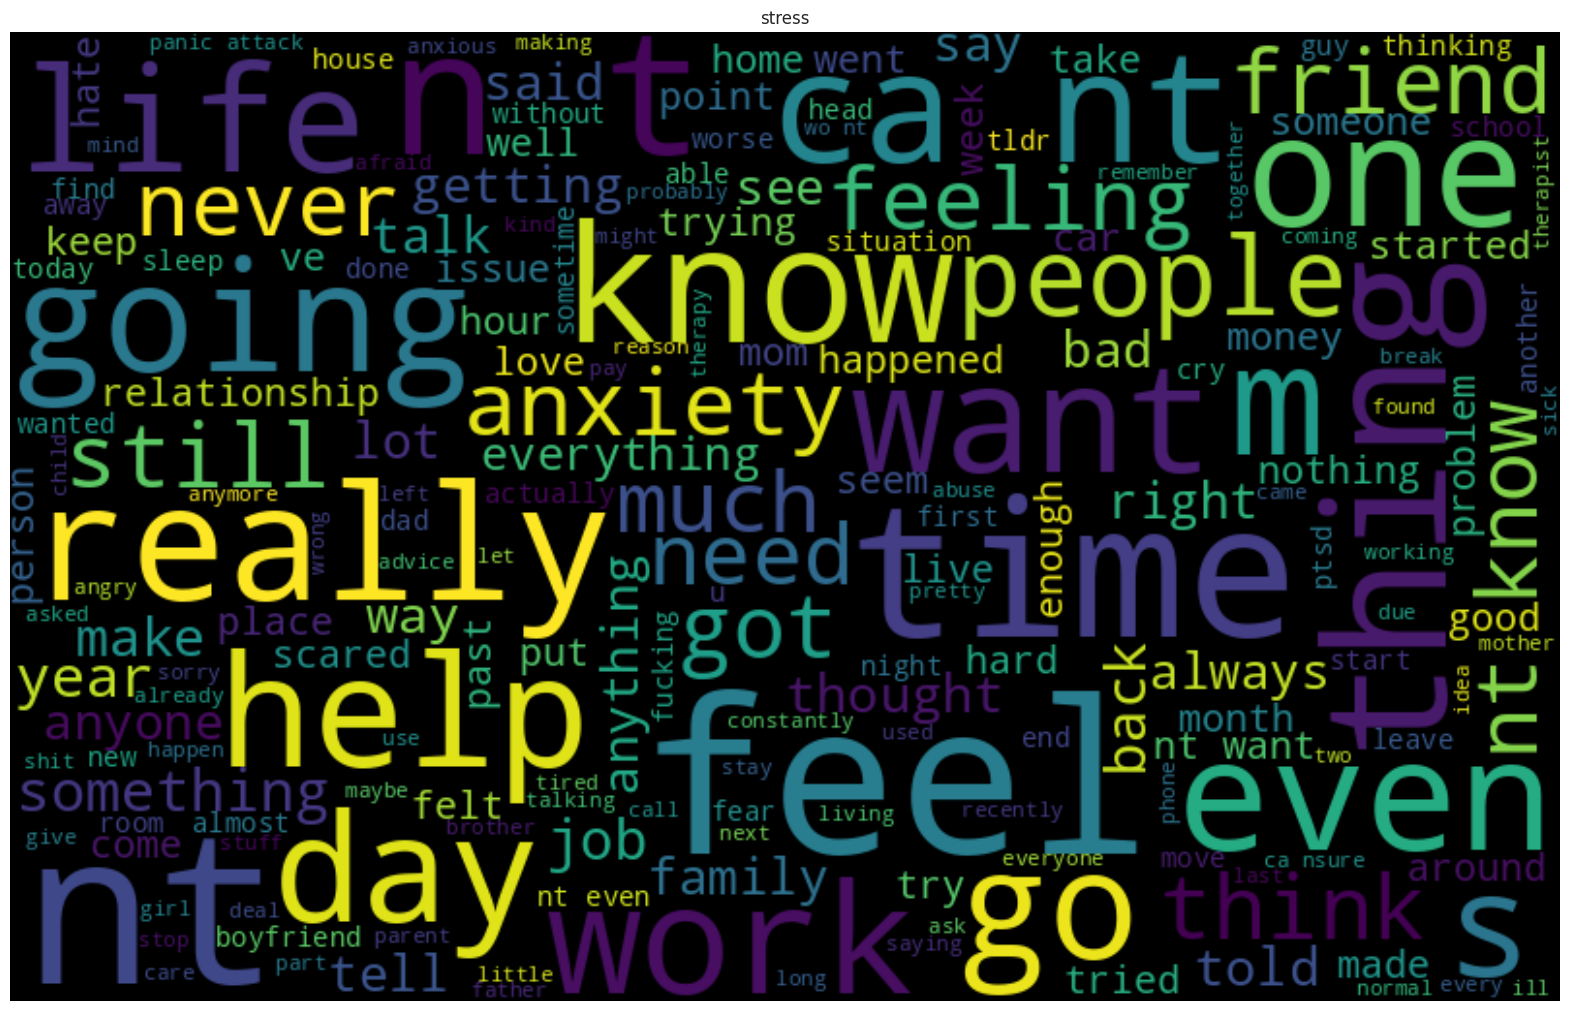

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

label_1_words_list = sum([list(tokens) for tokens in df[df['label'] == 1]['tokens']], [])
label_0_words_list = sum([list(tokens) for tokens in df[df['label'] == 0]['tokens']], [])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(label_1_words_list))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('stress')
plt.show()

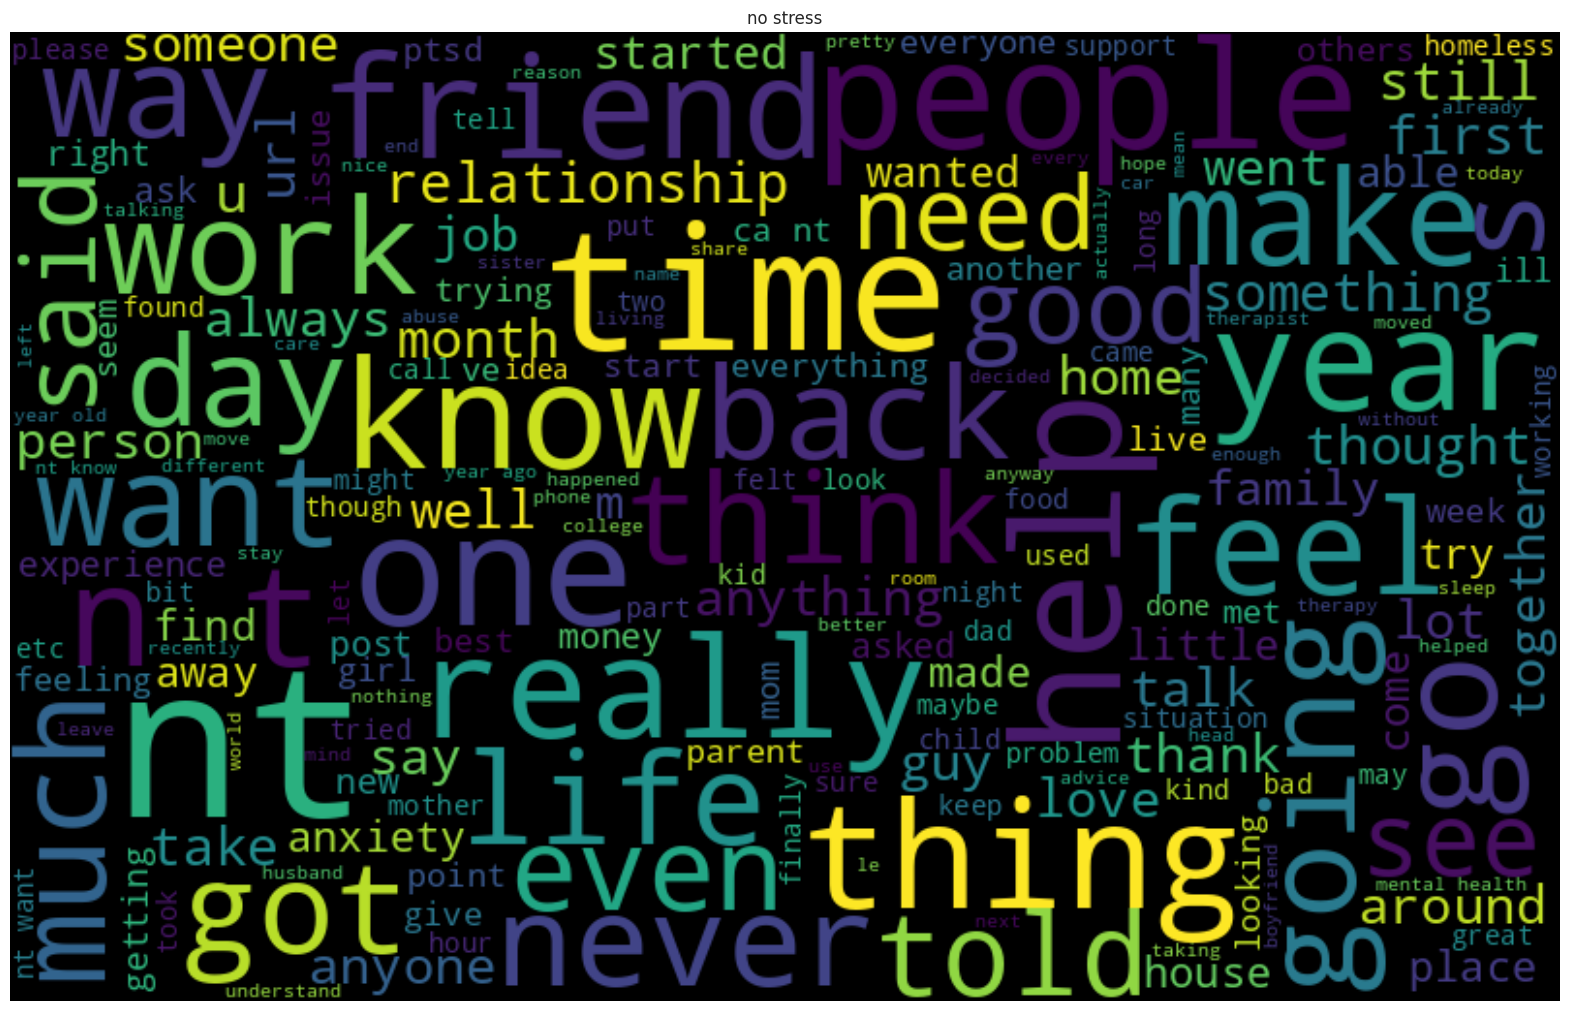

In [24]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(label_0_words_list))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('no stress')

plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.text,df.label,random_state = 0)
df['text']

0       he said he had not felt that way before sugget...
1       hey there rassistance not sure if this is the ...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend he is amazing he ...
4       october is domestic violence awareness month a...
                              ...                        
2833     her a week ago precious how are you i ignored...
2834    i dont have the ability to cope with it anymor...
2835    in case this is the first time youre reading t...
2836    do you find this normal they have a good relat...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [27]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

clf = LogisticRegression().fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       336
           1       0.77      0.84      0.80       374

    accuracy                           0.78       710
   macro avg       0.78      0.78      0.78       710
weighted avg       0.78      0.78      0.78       710
